In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=33304151a3b71e75b3669711447a8267


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | vastervik
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | sao gabriel da cachoeira
Processing Record 13 of Set 1 | bolonchen
City not found. Skipping...
Processing Record 14 of Set 1 | abilene
Processing Record 15 of Set 1 | panama city
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | ilulissat
Processing Re

Processing Record 33 of Set 4 | bandarbeyla
Processing Record 34 of Set 4 | butaritari
Processing Record 35 of Set 4 | chuy
Processing Record 36 of Set 4 | tiksi
Processing Record 37 of Set 4 | calvinia
Processing Record 38 of Set 4 | planaltina
Processing Record 39 of Set 4 | guantanamo
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | mrirt
City not found. Skipping...
Processing Record 42 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 43 of Set 4 | marawi
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | thinadhoo
Processing Record 47 of Set 4 | yaan
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | drezdenko
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | manta
Processing Record 2 of Set 5 | labuan
Processing Record 3 of Set 5 | viedma
Processing Record 4 of Set 5 | zyryanka
Processing Record 5 of Se

Processing Record 29 of Set 8 | baruun-urt
Processing Record 30 of Set 8 | shenjiamen
Processing Record 31 of Set 8 | kupino
Processing Record 32 of Set 8 | mapiripan
Processing Record 33 of Set 8 | ust-koksa
Processing Record 34 of Set 8 | vao
Processing Record 35 of Set 8 | chirilagua
Processing Record 36 of Set 8 | mitsamiouli
Processing Record 37 of Set 8 | matamoros
Processing Record 38 of Set 8 | pitimbu
Processing Record 39 of Set 8 | mhango
Processing Record 40 of Set 8 | la sarre
Processing Record 41 of Set 8 | goure
Processing Record 42 of Set 8 | jaisalmer
Processing Record 43 of Set 8 | nola
Processing Record 44 of Set 8 | mikkeli
Processing Record 45 of Set 8 | santa maria
Processing Record 46 of Set 8 | bengkulu
Processing Record 47 of Set 8 | coahuayana
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | datong
Processing Record 50 of Set 8 | the valley
Processing Record 1 of Set 9 | taraz
Processing Record 2 of Set 9 | leshukonskoye
Processing Recor

Processing Record 19 of Set 12 | brus laguna
Processing Record 20 of Set 12 | olinda
Processing Record 21 of Set 12 | vardo
Processing Record 22 of Set 12 | pittsburg
Processing Record 23 of Set 12 | mbuji-mayi
Processing Record 24 of Set 12 | olafsvik
Processing Record 25 of Set 12 | sulphur
Processing Record 26 of Set 12 | hurghada
Processing Record 27 of Set 12 | cedar city
Processing Record 28 of Set 12 | gat
Processing Record 29 of Set 12 | malokaterynivka
Processing Record 30 of Set 12 | ryotsu
Processing Record 31 of Set 12 | bitung
Processing Record 32 of Set 12 | narsaq
Processing Record 33 of Set 12 | hibbing
Processing Record 34 of Set 12 | tessalit
Processing Record 35 of Set 12 | dumabato
Processing Record 36 of Set 12 | mati
Processing Record 37 of Set 12 | husavik
Processing Record 38 of Set 12 | homer
Processing Record 39 of Set 12 | abnub
Processing Record 40 of Set 12 | muros
Processing Record 41 of Set 12 | road town
Processing Record 42 of Set 12 | khangah dogran
Pr

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,39.81,70,100,6.35,GL,2020-08-02 01:51:27
1,Mataura,-46.19,168.86,53.26,84,100,1.54,NZ,2020-08-02 01:51:27
2,Ribeira Grande,38.52,-28.70,70.93,67,1,7.47,PT,2020-08-02 01:51:28
3,Cape Town,-33.93,18.42,51.80,76,0,10.29,ZA,2020-08-02 01:47:36
4,Georgetown,5.41,100.34,80.60,88,20,4.70,MY,2020-08-02 01:51:20
5,Punta Arenas,-53.15,-70.92,35.60,93,100,5.82,CL,2020-08-02 01:51:28
6,Saint-Philippe,-21.36,55.77,68.00,72,90,9.17,RE,2020-08-02 01:51:28
7,Hobart,-42.88,147.33,55.99,47,75,17.22,AU,2020-08-02 01:50:48
8,Ushuaia,-54.80,-68.30,37.40,86,98,5.82,AR,2020-08-02 01:51:29
9,Sao Gabriel Da Cachoeira,-0.13,-67.09,74.16,91,100,1.05,BR,2020-08-02 01:51:29


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-08-02 01:51:27,77.48,-69.36,39.81,70,100,6.35
1,Mataura,NZ,2020-08-02 01:51:27,-46.19,168.86,53.26,84,100,1.54
2,Ribeira Grande,PT,2020-08-02 01:51:28,38.52,-28.70,70.93,67,1,7.47
3,Cape Town,ZA,2020-08-02 01:47:36,-33.93,18.42,51.80,76,0,10.29
4,Georgetown,MY,2020-08-02 01:51:20,5.41,100.34,80.60,88,20,4.70
5,Punta Arenas,CL,2020-08-02 01:51:28,-53.15,-70.92,35.60,93,100,5.82
6,Saint-Philippe,RE,2020-08-02 01:51:28,-21.36,55.77,68.00,72,90,9.17
7,Hobart,AU,2020-08-02 01:50:48,-42.88,147.33,55.99,47,75,17.22
8,Ushuaia,AR,2020-08-02 01:51:29,-54.80,-68.30,37.40,86,98,5.82
9,Sao Gabriel Da Cachoeira,BR,2020-08-02 01:51:29,-0.13,-67.09,74.16,91,100,1.05


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1596333204.6371558

In [15]:
today = time.strftime("%x")
today

'08/01/20'

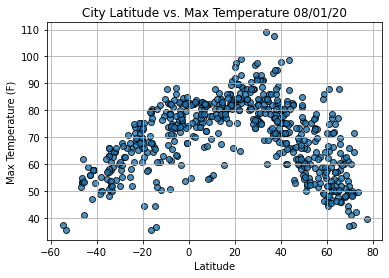

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

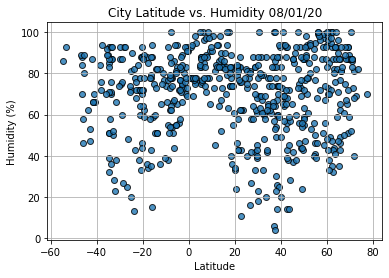

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

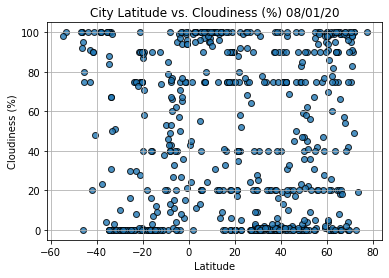

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

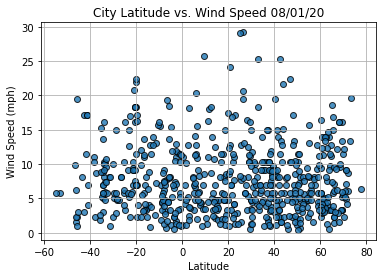

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2020-08-02 01:51:30
Lat                        -33.59
Lng                         26.89
Max Temp                    57.76
Humidity                       70
Cloudiness                      0
Wind Speed                  10.11
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
597     True
598     True
599    False
600    False
601     True
Name: Lat, Length: 602, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-08-02 01:51:27,77.48,-69.36,39.81,70,100,6.35
2,Ribeira Grande,PT,2020-08-02 01:51:28,38.52,-28.70,70.93,67,1,7.47
4,Georgetown,MY,2020-08-02 01:51:20,5.41,100.34,80.60,88,20,4.70
10,Abilene,US,2020-08-02 01:51:29,32.45,-99.73,91.40,33,1,8.05
11,Panama City,PA,2020-08-02 01:51:29,8.99,-79.52,82.40,78,95,6.93
...,...,...,...,...,...,...,...,...,...
593,Nuuk,GL,2020-08-02 01:53:25,64.18,-51.72,46.40,100,100,11.41
596,Borisovka,RU,2020-08-02 01:53:25,50.62,35.99,55.40,93,21,8.95
597,Lerwick,GB,2020-08-02 01:53:26,60.15,-1.15,51.80,100,98,5.82
598,Shelton,US,2020-08-02 01:53:26,41.32,-73.09,80.60,69,1,9.17


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

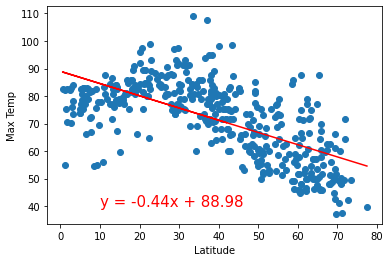

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

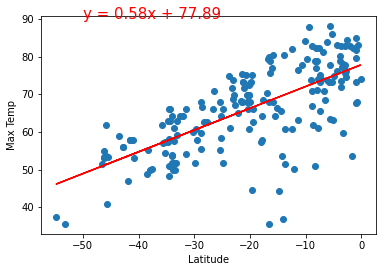

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

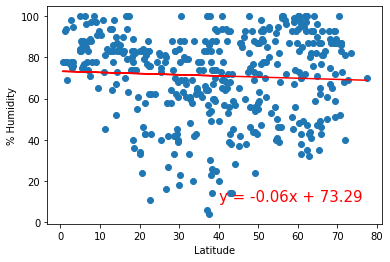

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

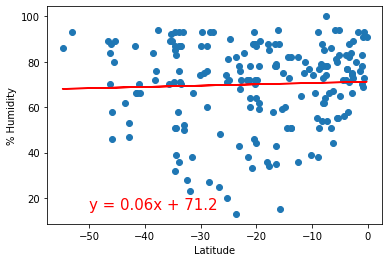

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

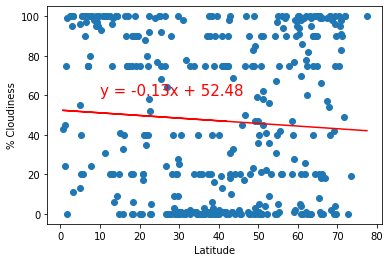

In [30]:
# Linear regression on the Nouthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

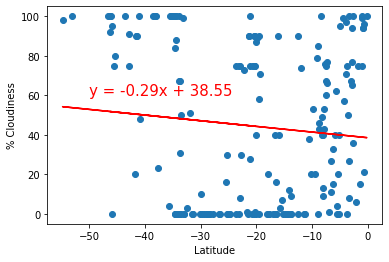

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

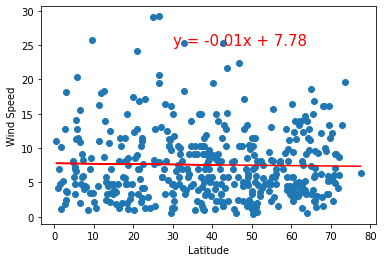

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,25))

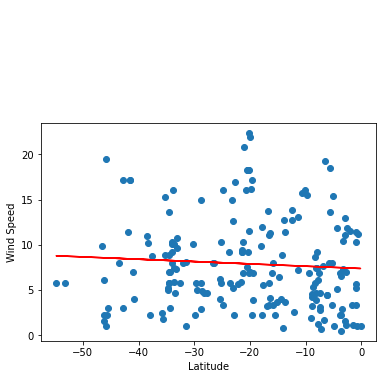

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))